In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('GOLD_2022_normalised_NEW-1000.csv')

In [3]:
# snumber 2371251
X = data.drop(columns=['Close_Bid']) 
y = data['Close_Bid'] 

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [4]:
X_train = np.expand_dims(X_train, axis=1)
X_val = np.expand_dims(X_val, axis=1)
X_test = np.expand_dims(X_test, axis=1)

In [5]:
model = Sequential([LSTM(61, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])), 
    Dense(1)
])

C:\Users\Karan\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [7]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=10, batch_size=32, 
                    validation_data=(X_val, y_val), 
                    callbacks=[early_stopping], verbose=1)

Epoch 1/10
7759/7759 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - loss: 0.1909 - mae: 0.1908 - val_loss: 0.0020 - val_mae: 0.0130
Epoch 2/10
7759/7759 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.0011 - mae: 0.0108 - val_loss: 6.2901e-04 - val_mae: 0.0079
Epoch 3/10
7759/7759 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 8.2189e-04 - mae: 0.0083 - val_loss: 2.8579e-04 - val_mae: 0.0085
Epoch 4/10
7759/7759 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 2.7261e-04 - mae: 0.0059 - val_loss: 1.8151e-04 - val_mae: 0.0096
Epoch 5/10
7759/7759 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 1.4226e-04 - mae: 0.0048 - val_loss: 2.6860e-05 - val_mae: 0.0032
Epoch 6/10
7759/7759 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 1.2634e-04 - mae: 0.0041 - val_loss: 1.6018e-05 - val_mae: 0.0014
Epoch 7/10
7759/7759 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 1.0996e-04 - mae: 0.0030 - val_loss: 2.0235e-05 - val_mae: 0.0017
Epoch 8/10
7759/7759 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 6.8825e-05 - mae: 0.0029 - val_loss: 6.8033e-06 - 

In [8]:
mse, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test MSE: {mse}")
print(f"Test MAE: {mae}")

Test MSE: 7.415371783281444e-06
Test MAE: 0.0010154664050787687


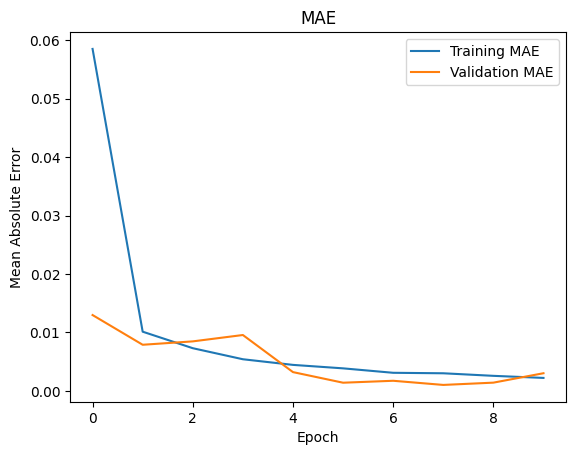

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 61)             │        19,764 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            62 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,480 (232.35 KB)

 Trainable params: 19,826 (77.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 39,654 (154.90 KB)

In [19]:
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('MAE')
plt.show()
model.summary()
